# Statistiques descriptives 

- compter le nombre de tweets par semaine
- nombre de likes moyens
- taux d'engagement
- indice

In [ ]:
!pip install pandas
!pip install matplotlib
!pip install numpy

## 1. Nombre de tweets par semaine

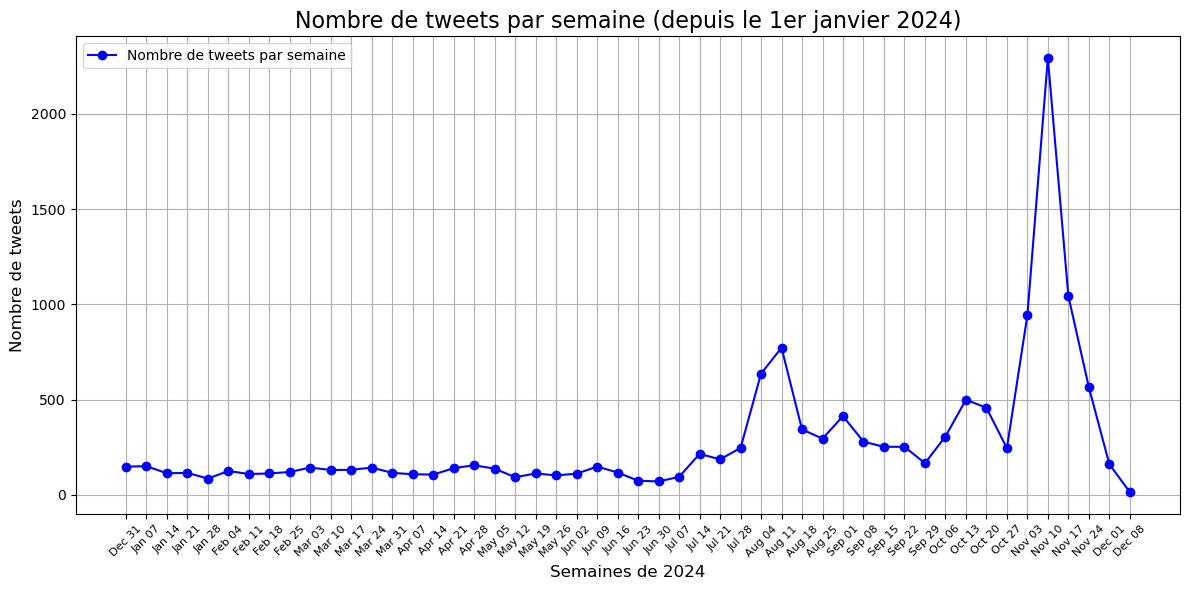

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Charger les données filtrées avec YearWeek
df = pd.read_excel('/home/onyxia/work/Scrapping_tweets/Scrapping_tweets/tweets_fusionnes.xlsx')

# Grouper par semaine et compter les tweets
tweets_per_week = df.groupby('YearWeek').size()


# Extraire les dates correspondantes aux semaines
weeks = tweets_per_week.index
dates = pd.to_datetime(weeks + '-0', format='%Y-%U-%w')  # Convertir YearWeek en date réelle

# Créer le graphique
plt.figure(figsize=(12, 6))
tweets_per_week.plot(kind='line', marker='o', color='blue', label='Nombre de tweets par semaine')

# Ajuster l'axe des abscisses
ax = plt.gca()
ax.set_xticks(range(len(dates)))  # Position des ticks
ax.set_xticklabels([d.strftime('%b %d') for d in dates], rotation=45, fontsize=8)  # Afficher les semaines

# Ajouter les mois uniquement à certaines positions
#month_labels = [d.strftime('%b') if d.day < 8 else '' for d in dates]
#for i, label in enumerate(month_labels):
#    if label:
 #       plt.text(i, -0.05 * max(tweets_per_week), label, ha='center', fontsize=10, color='red', transform=ax.transData)

# Ajouter un titre et des labels
plt.title('Nombre de tweets par semaine (depuis le 1er janvier 2024)', fontsize=16)
plt.xlabel('Semaines de 2024', fontsize=12)
plt.ylabel('Nombre de tweets', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()


## 2. likes

Evolution des nombres de likes, vues, retweets et commentaires.

## 3. Création d'indices

### 3.1. Taux d'engagement

In [ ]:
#REMPLACER YEARWEEK PAR YEARMONTH SI RESULTATS VOULUS

import pandas as pd
import matplotlib.pyplot as plt

# Charger les données initiales
df = pd.read_excel('tweets_fusionnes.xlsx')

def calculate_engagement(df):
    """
    Calculer le taux d'engagement pour chaque ligne.
    """
    if not {'Likes', 'Views'}.issubset(df.columns):
        raise ValueError("Les colonnes 'Likes' et 'Views' sont nécessaires pour calculer le taux d'engagement.")

    # Ajouter la colonne 'Taux_Engagement'
    df['Taux_Engagement'] = ((df['Likes'] + df.get('Comments', 0) + df.get('Repost', 0)) / df['Views']) * 100
    print("Taux d'engagement calculé et ajouté au DataFrame.")
    return df

def calculate_weekly_stats(df):
    """
    Calculer les totaux par semaine, la croissance des likes, et le taux d'engagement moyen.
    """
    if 'YearWeek' not in df.columns:
        raise ValueError("La colonne 'YearWeek' est nécessaire pour calculer les statistiques hebdomadaires.")

    # Grouper par semaine et calculer les totaux
    weekly_stats = df.groupby('YearMonth').agg(
        TotalLikes=('Likes', 'sum'),
        TotalViews=('Views', 'sum'),
        NombreTweets=('YearMonth', 'size'),
        TotalEngagement=('Taux_Engagement', 'mean')  # Engagement moyen par semaine
    ).reset_index()  # Réinitialiser l'index pour un DataFrame propre

    # Ajouter la croissance des likes
    weekly_stats['CroissanceLikes'] = weekly_stats['TotalLikes'].pct_change() * 100
    return weekly_stats

# Étape 1 : Calculer le taux d'engagement
df_engagement = calculate_engagement(df)

# Étape 2 : Calculer les statistiques hebdomadaires
weekly_stats = calculate_weekly_stats(df_engagement)

# Étape 3 : Créer un graphique combiné
fig, ax1 = plt.subplots(figsize=(12, 6))

# Graphique du nombre de tweets (axe principal)
ax1.bar(weekly_stats['YearMonth'], weekly_stats['NombreTweets'], color='skyblue', alpha=0.7, label='Nombre de Tweets')
ax1.set_xlabel('Semaine (YearMonth)', fontsize=12)
ax1.set_ylabel('Nombre de Tweets', fontsize=12, color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.tick_params(axis='x', rotation=45)
ax1.legend(loc='upper left')

# Ajouter le deuxième axe pour le taux d'engagement moyen
ax2 = ax1.twinx()
ax2.plot(weekly_stats['YearMonth'], weekly_stats['TotalEngagement'], color='green', marker='o', label='Taux d\'Engagement (%)', linestyle='--')
ax2.set_ylabel('Taux d\'Engagement (%)', fontsize=12, color='green')
ax2.tick_params(axis='y', labelcolor='green')
ax2.legend(loc='upper right')

# Ajouter le troisième axe pour la croissance hebdomadaire des likes
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))  # Déplacer le troisième axe légèrement vers la droite
ax3.plot(weekly_stats['YearMonth'], weekly_stats['CroissanceLikes'], color='red', marker='s', label='Croissance des Likes (%)', linestyle=':')
ax3.set_ylabel('Croissance des Likes (%)', fontsize=12, color='red')
ax3.tick_params(axis='y', labelcolor='red')
ax3.legend(loc='lower right')

#axe 4 rajout de ma part éventuellement supprimer
ax4 = ax1.twinx()
ax4.plot(weekly_stats['YearMonth'], weekly_stats['TotalViews'], color='purple', marker='o', label='Taux d\'Engagement (%)', linestyle='--')
ax4.set_ylabel('Taux d\'Engagement (%)', fontsize=12, color='green')
ax4.tick_params(axis='y', labelcolor='purple')
ax4.legend(loc='upper right')

# Ajouter un titre
plt.title('Nombre de Tweets, Taux d\'Engagement et Croissance Hebdomadaire', fontsize=16)

# Ajouter une grille pour le graphique
ax1.grid(True, linestyle='--', alpha=0.5)

# Ajuster le layout pour éviter le chevauchement
fig.tight_layout()

# Afficher le graphique
plt.show()

# Sauvegarder les statistiques hebdomadaires dans un fichier Excel
weekly_stats.to_excel('weekly_stats_calculated.xlsx', index=False)

df['Taux_Engagement'].to_excel('base_fin.xlsx', index=False)
